## **BUSSINESS UNDERSTANDING**

#### **1. Latar Belakang**
Dalam industri ritel yang sangat kompetitif, pemahaman mendalam terhadap pelanggan adalah kunci keberhasilan. Toko sering kali melakukan berbagai gelombang promosi (campaign waves) untuk menarik minat beli. Namun, mengirimkan semua jenis promosi ke seluruh pelanggan tanpa target yang jelas adalah strategi yang tidak efisien, memboroskan biaya pemasaran, dan berpotensi mengganggu kenyamanan pelanggan (*spamming*). <br>
Dataset ini berisi data demografi, perilaku belanja, dan riwayat respons pelanggan terhadap kampanye pemasaran sebelumnya.

#### **2. Rumusan Masalah**
Saat ini, toko menghadapi tantangan ketidakefisienan dalam pelaksanaan promosi. Belum adanya sistem yang dapat memprediksi secara spesifik pada **gelombang promosi ke-berapa** seorang pelanggan akan tertarik, menyebabkan toko harus menebar promosi secara acak atau berurutan yang memakan biaya besar.

#### **3. Tujuan**
Tujuan dari proyek ini adalah membangun model Machine Learning untuk:
- Mengklasifikasikan preferensi pelanggan berdasarkan fitur demografi dan perilaku belanja.
- Memprediksi pada **gelombang promosi ke berapa** (1 s.d 6) seorang pelanggan diprediksi akan menerima penawaran (Response).

#### **4. Manfaat**
Keberhasilan model ini diharapkan memberikan dampak positif berupa:
- **Cost Efficiency:** Mengurangi biaya pemasaran dengan tidak mengirimkan promosi yang tidak relevan ke pelanggan tertentu.
- **High Conversion Rate:** Meningkatkan pendapatan (revenue) dengan menargetkan pelanggan pada momen (gelombang) yang paling tepat.
- **Customer Experience:** Meningkatkan kepuasan pelanggan karena menerima penawaran yang relevan (personalisasi), bukan spam.

## **IMPORT LIBRARY**

In [2]:
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')
import math
import matplotlib.ticker as ticker

## **DATA LOADING**

In [3]:
# load dan read data
url_train = "https://drive.google.com/uc?export=download&id=1mwBc1Xbdp5vezgcQLi-BWcsaVNxiqblv"
url_test = "https://drive.google.com/uc?export=download&id=1nSQr83pGwZQ-ShLgrDWH0AoPEi3E5FgF"
url_label = "https://drive.google.com/uc?export=download&id=169-NXQYAKyntsfhcEjzWc0oNB4dD4DkQ"

df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)
df_label = pd.read_csv(url_label)

In [4]:
df_train.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN


In [5]:
df_test.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


In [6]:
df_label.head()

,jumlah_promosi
0,2
1,0
2,1
3,4
4,4


## **DATA UNDERSTANDING**

### **1. DATA DICTIONARY**

Berikut adalah penjelasan mengenai fitur-fitur yang terdapat dalam dataset:

| Nama Fitur | Deskripsi | Tipe Data |
| :--- | :--- | :--- |
| **Profil Pelanggan** | | |
| `tahun_kelahiran` | Tahun kelahiran pelanggan | Numerik (Integer) |
| `pendidikan` | Tingkat pendidikan terakhir (SMP, SMA, Sarjana, Magister, Doktor) | Kategorikal (Ordinal) |
| `status_pernikahan` | Status pernikahan (Sendiri, Rencana Menikah, Menikah, Cerai, Cerai Mati) | Kategorikal (Nominal) |
| `pendapatan` | Pendapatan tahunan pelanggan dalam Rupiah | Numerik (Float) |
| `jumlah_anak_balita` | Banyaknya anak pelanggan yang masih balita di rumah | Numerik (Integer) |
| `jumlah_anak_remaja` | Banyaknya anak pelanggan yang sudah remaja di rumah | Numerik (Integer) |
| `tanggal_menjadi_anggota` | Tanggal pertama kali pelanggan terdaftar sebagai member | Datetime |
| **Perilaku Belanja** | | |
| `terakhir_belanja` | Jumlah hari yang berlalu sejak belanja terakhir (*Recency*) | Numerik (Integer) |
| `belanja_buah` | Biaya yang dikeluarkan untuk produk buah-buahan | Numerik (Integer) |
| `belanja_daging` | Biaya yang dikeluarkan untuk produk daging | Numerik (Integer) |
| `belanja_ikan` | Biaya yang dikeluarkan untuk produk ikan | Numerik (Integer) |
| `belanja_kue` | Biaya yang dikeluarkan untuk produk kue/manisan | Numerik (Integer) |
| **Kanal Pembelian** | | |
| `pembelian_diskon` | Jumlah pembelian yang dilakukan saat periode diskon | Numerik (Integer) |
| `pembelian_web` | Jumlah pembelian yang dilakukan melalui website (Daring) | Numerik (Integer) |
| `pembelian_toko` | Jumlah pembelian yang dilakukan langsung di toko (Luring) | Numerik (Integer) |
| **Interaksi & Target** | | |
| `keluhan` | Riwayat komplain (1 = Pernah, 0 = Tidak Pernah) | Biner / Boolean |
| `jumlah_promosi` | **(Target Label)** Menunjukkan pada gelombang promosi ke-berapa pelanggan menerima penawaran (1-6). Nilai 0 berarti tidak menerima tawaran sama sekali. | Kategorikal |

### **2. DATA STRUCTURE & QUALITY**

In [7]:
# mengecek banyak data
print(f"Baris: {df_train.shape[0]} \nKolom: {df_train.shape[1]}")

Baris: 3817 
Kolom: 16


In [8]:
# menampilkan infomasi terkait struktur dataframe train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

💡Insight : Tipe data pada atribut `tanggal_menjadi_anggota` perlu dikonversi menjadi tipe data date, kemudian beberapa atribut yang bertipe data float juga perlu di sesuaikan seperti salah satunya atribut `jumlah_anak_balita` sebaiknya menggunakan tipe data integer untuk menghindari data yang desimal, karena tidak mungkin jumlah anak desimal.

In [9]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   jumlah_promosi  3817 non-null   int64
dtypes: int64(1)
memory usage: 29.9 KB


In [10]:
# mengecek missing value
print(f"{df_train.isnull().sum()}\n\nTotal Missing Values: {df_train.isnull().sum().sum()}")

tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
dtype: int64

Total Missing Values: 5383


In [11]:
# mengecek duplicate
print(f"Total Data Duplicated: {df_train.duplicated().sum()}")

Total Data Duplicated: 0


### **3. EXPLORATORY DATA ANALYSIS (EDA)**

In [12]:
# merubah tipe data atribut ke date
df_train['tanggal_menjadi_anggota'] = df_train['tanggal_menjadi_anggota'].apply(pd.to_datetime)
df_test['tanggal_menjadi_anggota'] = df_test['tanggal_menjadi_anggota'].apply(pd.to_datetime)

# merubah tipe data atribut ke kategorikal
df_train['keluhan'] = df_train['keluhan'].astype('object')
df_test['keluhan'] = df_test['keluhan'].astype('object')

#### **- Descriptive Analysis**

In [13]:
# menampilkkan statistik untuk kolom numerik
print("Statistik Deskriptif Numerik:")
display(df_train.describe().T)

Statistik Deskriptif Numerik:


,count,mean,min,25%,50%,75%,max,std
tahun_kelahiran,3817.0,1967.823946,1899.0,1959.0,1968.0,1976.0,2000.0,11.768131
pendapatan,3627.0,114483170.089606,5073000.0,81125122.0,115621394.0,150495956.0,332884000.0,43460423.969516
jumlah_anak_balita,3627.0,0.29308,0.0,0.0,0.0,1.0,2.0,0.473063
jumlah_anak_remaja,3613.0,0.353723,0.0,0.0,0.0,1.0,2.0,0.493014
terakhir_belanja,3645.0,47.23155,0.0,25.0,47.0,69.0,128.0,27.068512
belanja_buah,3636.0,59804.239824,0.0,7907.0,26456.0,86162.0,396508.0,74024.976109
belanja_daging,3639.0,438574.823853,0.0,49479.5,221993.0,686355.5,3489675.0,512042.740059
belanja_ikan,3624.0,81428.997792,0.0,10115.0,36054.5,121380.0,621600.0,99976.226855
belanja_kue,3603.0,63377.97058,0.0,7947.0,27795.0,89502.5,542164.0,79435.457282
pembelian_diskon,3639.0,2.125584,0.0,0.0,2.0,3.0,20.0,2.100133


💡Insight :
- Hampir semua atribut memiliki missing value, kecuali `tahun_kelahiran`, yang memiliki jumlah data lengkap (total data = 3817)
- Pelanggan lahir rentang tahun 1899-2000 dan rata-rata pelanggan lahir di tahun 1967
- Jika dilihat dari persebaran data (std), skala dari setiap atribut bervariasi
- Atribut  `pendapatan`, `belanja_buah`, `belanja_daging`, `belanja_ikan`, dan `belanja kue` memiliki nilai yang bervariasi (std/mean) -> pengeluaran juga bermacam macam tiap pelanggan, pendapatan pelanggan juga berbeda beda
- Pelanggan rata rata tidak punya anak namun beberapa pelanggan mempunyai 1-2 anak
- Hampir semua atribut memiliki distribusi skew ke kanan (mean < median)
- Rata-rata pelanggan tidak mempunyai keluhan terhadap toko

In [14]:
# menampilkkan statistik untuk kolom numerik
print("\nStatistik Deskriptif Kategorikal:")
display(df_train.describe(include='object').T)


Statistik Deskriptif Kategorikal:


,count,unique,top,freq
pendidikan,3628,6,Sarjana,1841
status_pernikahan,3605,6,Rencana Menikah,1271
keluhan,3621.0,2.0,0.0,3603.0


#### **- Univariate Analysis**

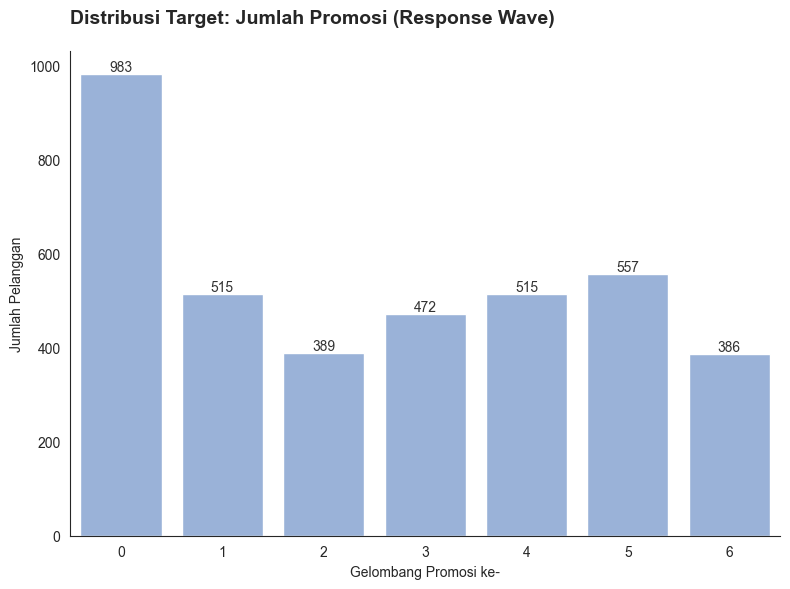

In [15]:
# mengecek distribusi target
plt.figure(figsize=(8, 6))

ax = sns.countplot(
    data=df_label,
    x='jumlah_promosi',
    order=df_label['jumlah_promosi'].unique().sort(),
    color='#8fafe3'
)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10,
        color='#333',
        fontweight='normal'
    )

ax.set_title('Distribusi Target: Jumlah Promosi (Response Wave)', fontsize=14, weight='bold', loc='left', pad=20)
ax.set_xlabel('Gelombang Promosi ke-')
ax.set_ylabel('Jumlah Pelanggan')

sns.despine(ax=ax)
plt.tight_layout()
plt.show()


💡Insight:
Data pada setiap label tidak seimbang, perlu dilakukannya teknik balancing seperti menggunakan oversampling smote

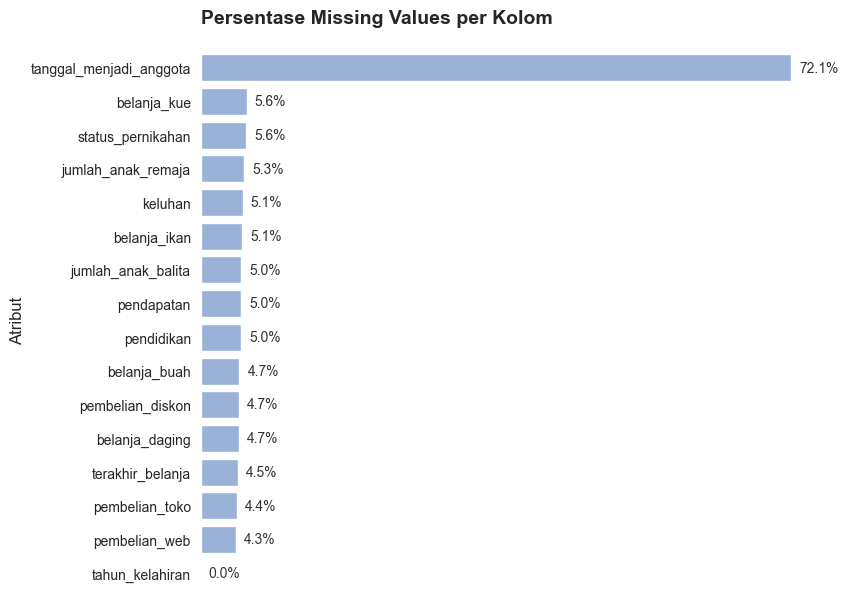

In [16]:
# mengecek proporsi missing value pada setiap fitur/kolom
missing = df_train.isnull().mean().sort_values(ascending=False) * 100

plt.figure(figsize=(8, 7))

ax = sns.barplot(
    x=missing.values,
    y=missing.index,
    color='#8fafe3'
)

plt.title("Persentase Missing Values per Kolom", fontsize=14, weight='bold', pad=20, loc='left')

plt.xlabel(None)
plt.xticks([])

plt.ylabel("Atribut", fontsize=12)

for i, v in enumerate(missing.values):
    ax.text(
        v + 1, i, f"{v:.1f}%",
        va='center',
        fontweight='normal',
        fontsize=10,
        color='#333'
    )

sns.despine(left=True, bottom=True)
plt.show()

💡Insight: Untuk atribut `tanggal_menjadi_anggota` akan di drop karena memiliki persentase missing value > 50%, dan sisanya akan dilakukan inputasi

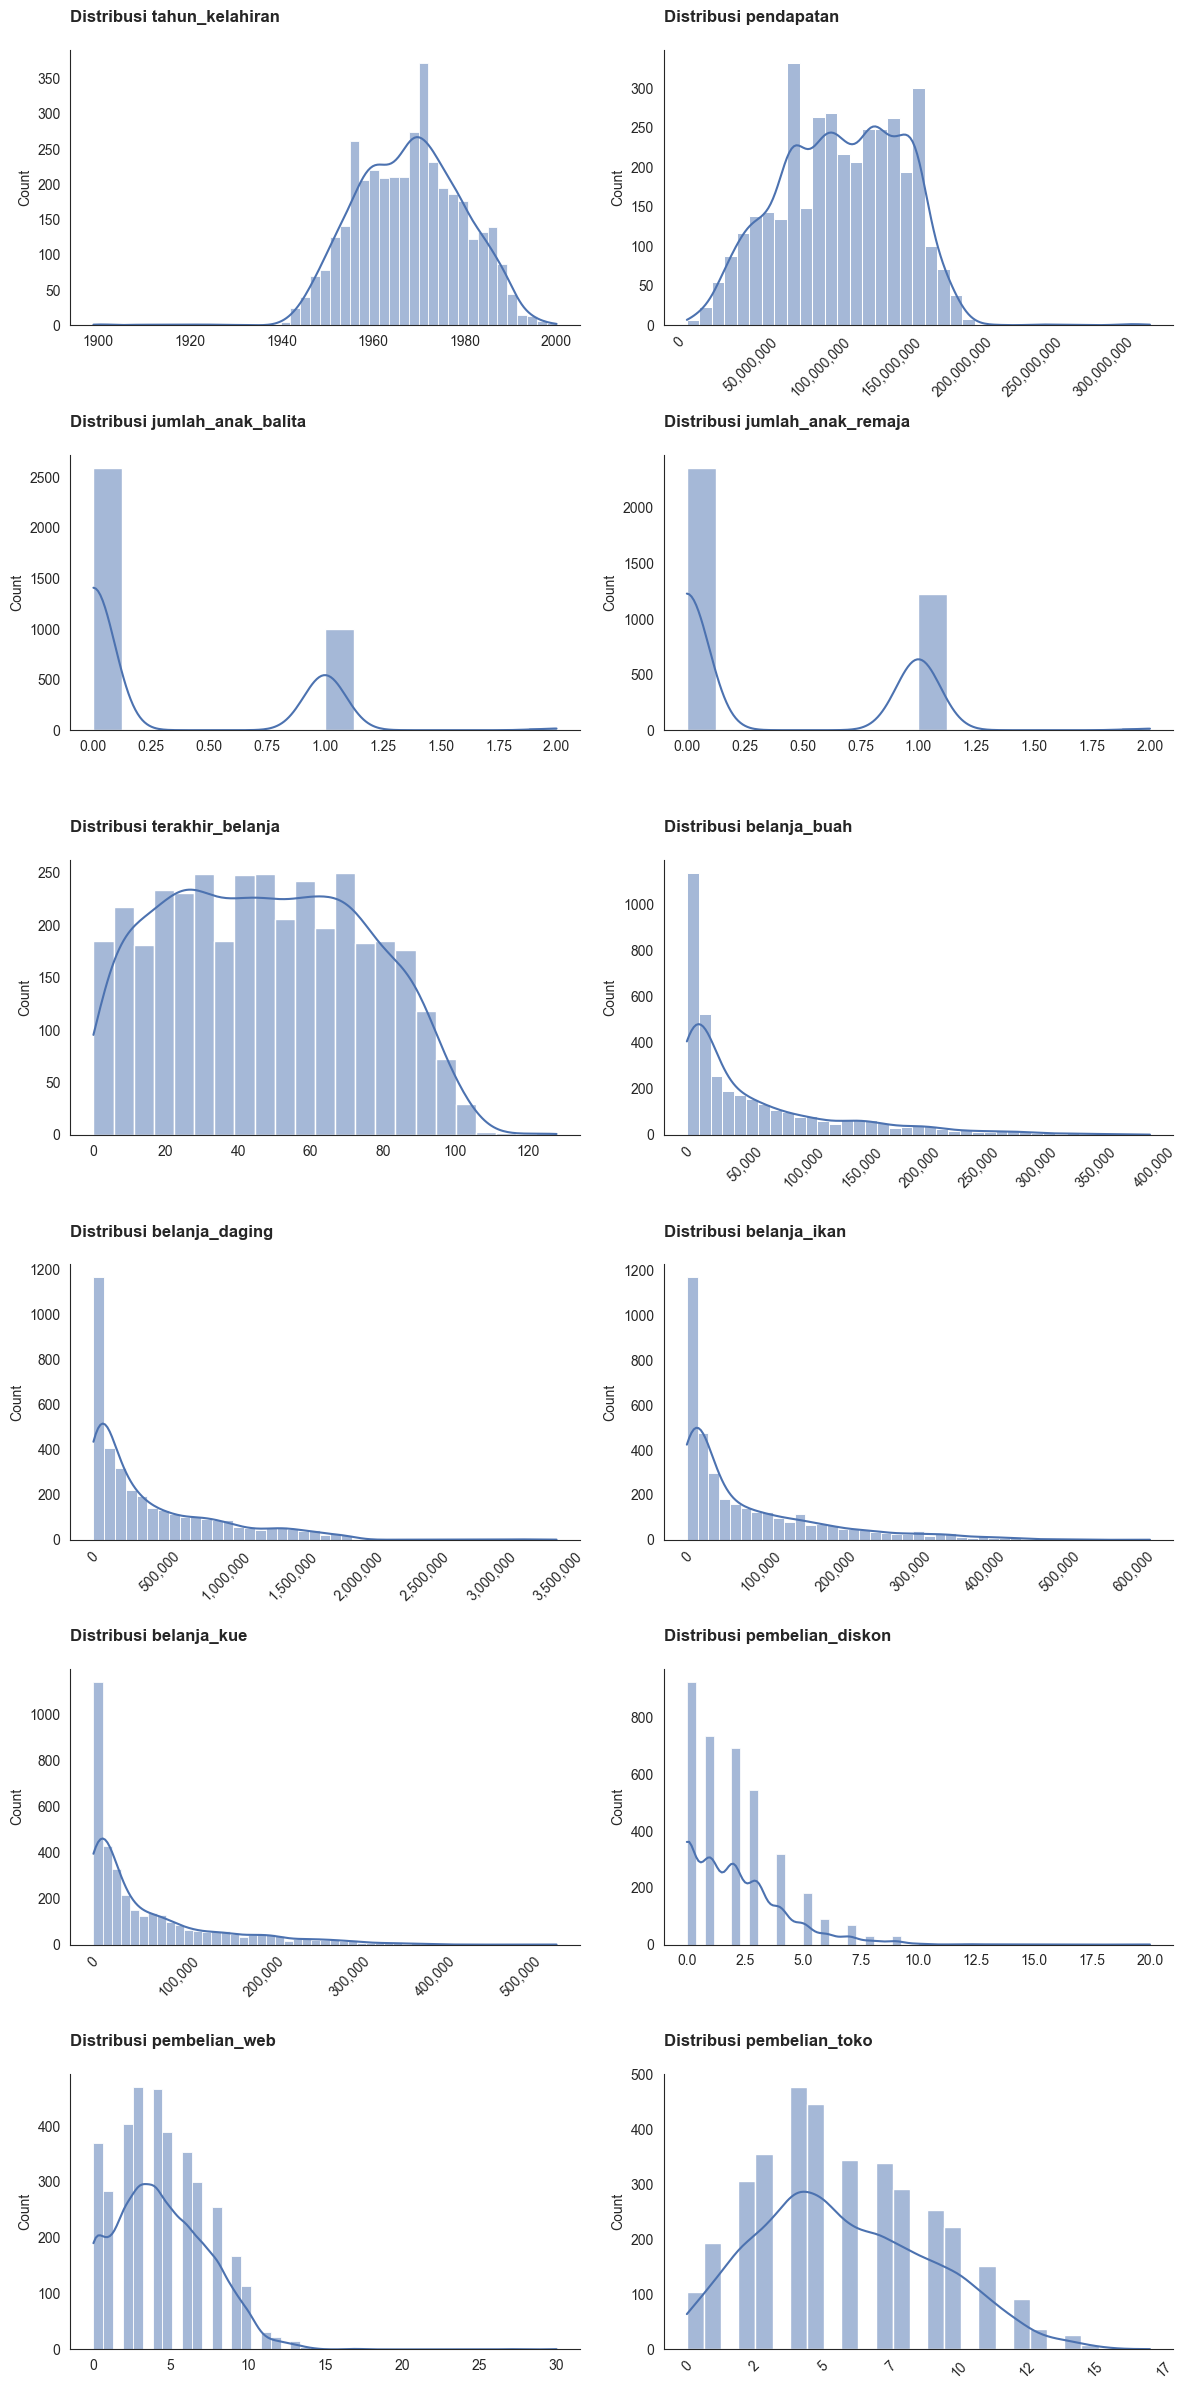

In [17]:
# mengetahui distribusi data untuk atribut numerik
numerik = df_train.select_dtypes(include='number').columns

x_formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
n_cols = 2
n_rows = (len(numerik) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

kolom_angka_besar = ['pendapatan', 'belanja_daging', 'belanja_ikan',
                     'belanja_kue', 'belanja_buah', 'belanja_web',
                     'pembelian_toko']

for col, ax in zip(numerik, axes):

    sns.histplot(
        df_train[col],
        kde=True,
        ax=ax,
        color="#4c72b0"
    )

    ax.set_title(f'Distribusi {col}', fontsize=12, pad=20, loc='left', weight='bold')
    ax.set_xlabel(None)
    ax.set_ylabel('Count')

    if col in kolom_angka_besar:
        ax.xaxis.set_major_formatter(x_formatter)
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.tick_params(axis='x', rotation=0)

    sns.despine(ax=ax)

for i in range(len(numerik), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

💡Insight:
-  Atribut belanja dan pembelian memiliki distribusi right skew dimana ekornya lebih panjang di kanan, namun yang paling ekstrim ada di atribut belanja-> bisa ditangani dengan log transform
- Skala tiap atribut berbeda-beda dan adanya indikasi outlier -> pertimbangan menggunakan robust scaler

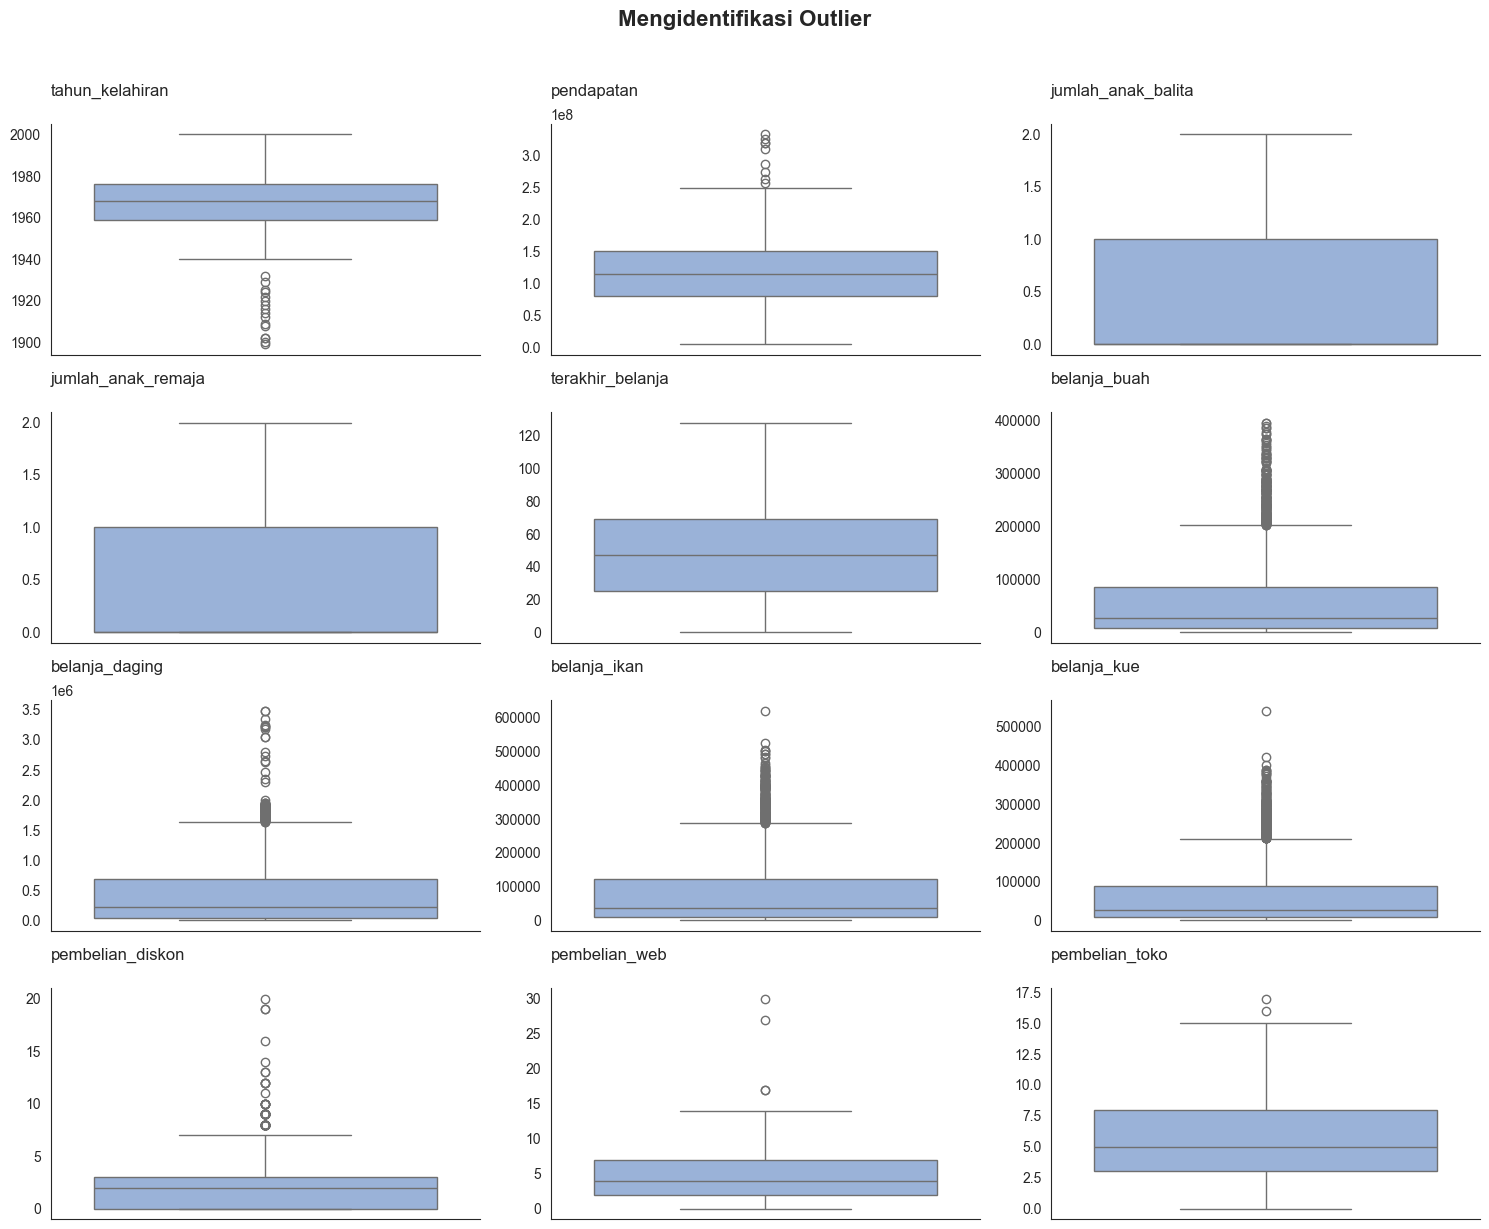

In [18]:
# mengidentifikasi outlier
n = len(numerik)
cols_per_row = 3
rows = math.ceil(n / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 3 * rows))
axes = axes.flatten()

for col, ax in zip(numerik, axes):

    sns.boxplot(
        y=df_train[col],
        ax=ax,
        color="#8fafe3"
    )

    ax.set_title(f'{col}', fontsize=12, pad=20, loc='left')
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    sns.despine(ax=ax)

fig.suptitle(
    "Mengidentifikasi Outlier",
    y=1.02,
    fontsize=16,
    weight='bold'
)

for i in range(len(numerik), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

💡Insight:
Banyak atribut yang memiliki outlier, namun jika melihat pada konteks dari atribut, hal ini bisa saja wajar terjadi, sehingga solusinya mungkin tidak dengan memotong atau membuat outlier karena akan menghilangkan sebagian atau seluruh informasinya, tapi solusinya bisa dengan mencoba mengurangi efeknya terhadap atribut lain dan model

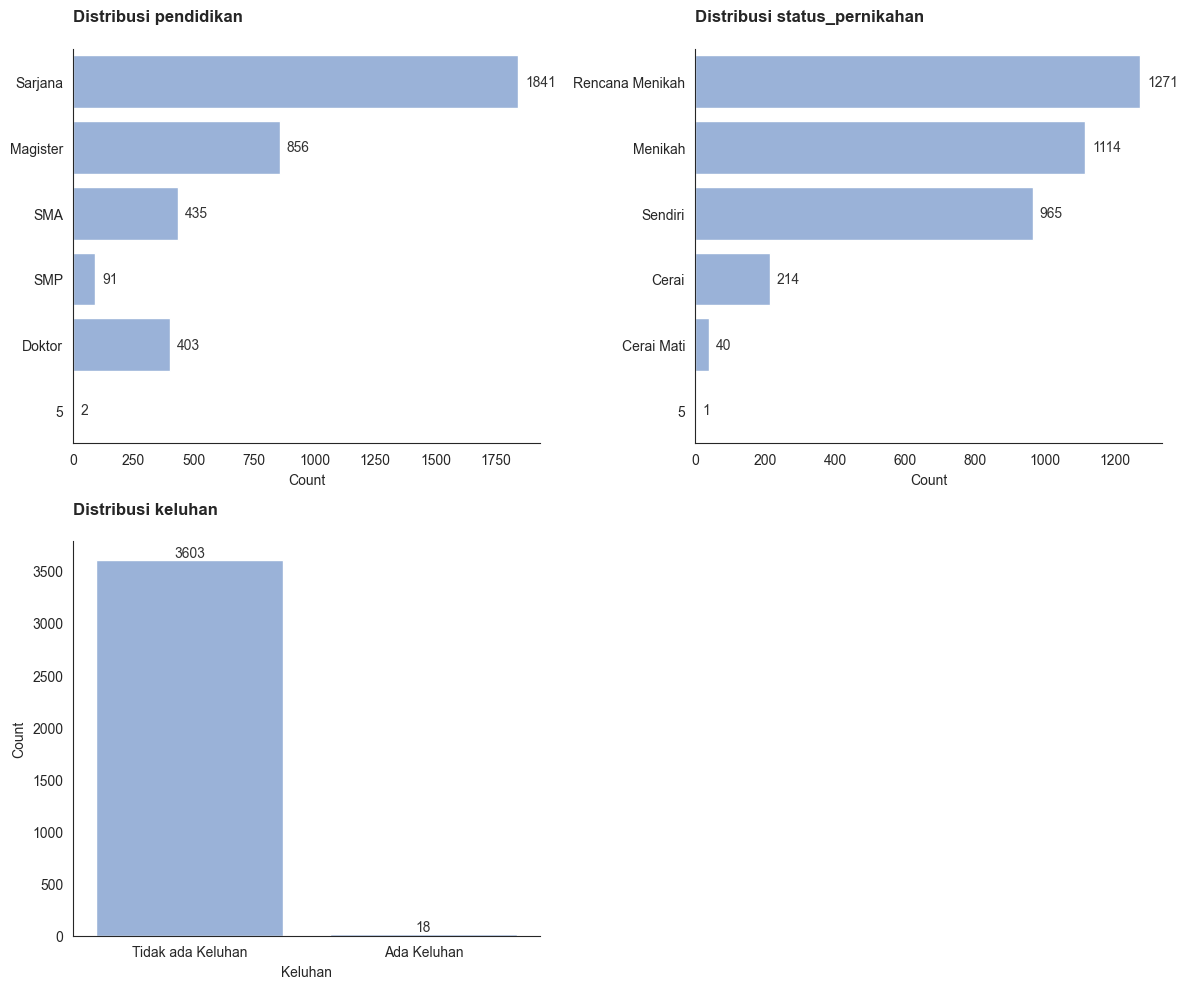

In [19]:
# mengetahui distribusi data untuk atribut kategori
map_keluhan = {0 : 'Tidak ada Keluhan' , 1 : 'Ada Keluhan'}
df_train['keluhan'] = df_train['keluhan'].map(map_keluhan)
df_test['keluhan'] = df_test['keluhan'].map(map_keluhan)

kategori = df_train.select_dtypes(include='object').columns

n_cols = 2
n_rows = (len(kategori) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
axes = axes.flatten()

for col, ax in zip(kategori, axes):

    if col == 'keluhan':
        sns.countplot(
            data=df_train,
            x=col,
            ax=ax,
            color='#8fafe3'
        )

        for p in ax.patches:
            ax.annotate(
                f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10, color='#333', fontweight='normal'
            )

        ax.set_xlabel('Keluhan')
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=0)

    else:
        sns.countplot(
            data=df_train,
            y=col,
            ax=ax,
            color='#8fafe3'
        )

        for p in ax.patches:
            nilai = int(p.get_width())
            pos_y = p.get_y() + p.get_height() / 2.
            ax.annotate(
                f'{nilai}',
                (p.get_width(), pos_y),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=10, color='#333', fontweight='normal'
            )

        ax.set_xlabel('Count')
        ax.set_ylabel(None)

    ax.set_title(
        f'Distribusi {col}',
        fontsize=12,
        pad=20,
        weight='bold',
        loc='left'
    )
    sns.despine(ax=ax)

for i in range(len(kategori), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

💡Insight:
- Terdapat anomali kategori `5` -> perlu di drop
- Banyak pelanggan tidak memiliki keluhan terhadap toko

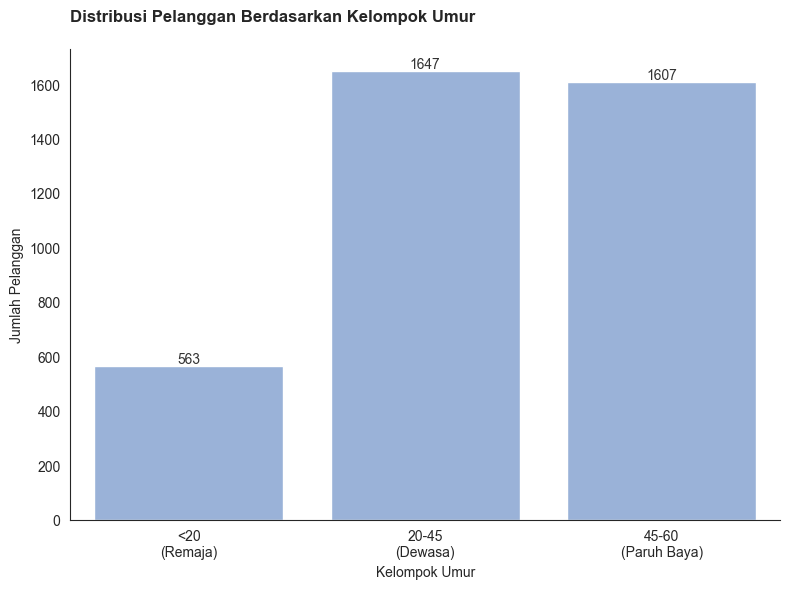

In [20]:
# mengelompokan umur kedalam kategori umur
umur = 2025 - df_train['tahun_kelahiran']

bins = [20, 45, 60, 200]
labels = ['20-45', '45-60', '60+']
df_train['kelompok_umur'] = pd.cut(umur, bins=bins, labels=labels, right=False, include_lowest=True)

# melakukan visualisasi
plt.figure(figsize=(8, 6))

kelompok_usia = [
    '<20\n(Remaja)',
    '20-45\n(Dewasa)',
    '45-60\n(Paruh Baya)',
    '60+\n(Lansia)'
]

ax = sns.countplot(
    data=df_train,
    x='kelompok_umur',
    order=labels,
    color='#8fafe3'
)

ax.set_xticklabels(kelompok_usia, fontsize=10)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10,
        color='#333',
        fontweight='normal'
    )

ax.set_title(
    'Distribusi Pelanggan Berdasarkan Kelompok Umur',
    fontsize=12,
    weight='bold',
    pad=20,
    loc='left'
)
ax.set_xlabel('Kelompok Umur')
ax.set_ylabel('Jumlah Pelanggan')

sns.despine(ax=ax)
plt.tight_layout()
plt.show()

💡Insight:
Kebanyakan pembeli itu berumur 45-60 dan 60>

Rata-rata Total Belanja:
is_member
0    660517.965116
1    487442.324883
Name: total_belanja, dtype: float64

---


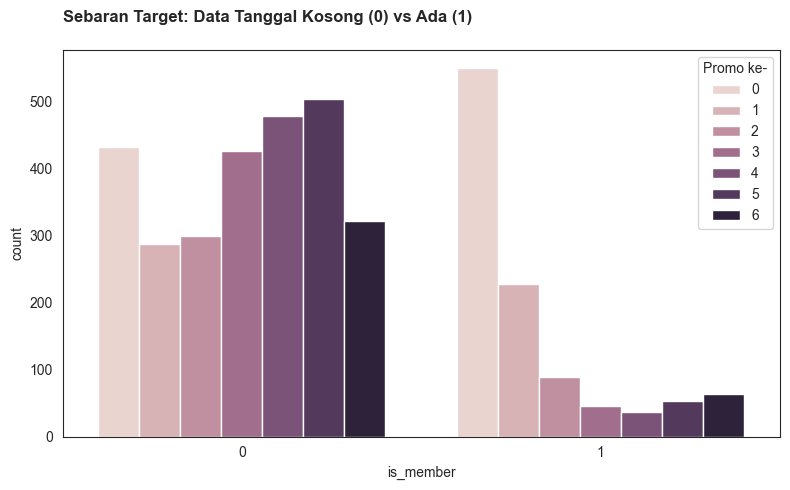

In [21]:
# mengecek apakah tanggalnya pada fitur tanggal_menjadi_angggota kosong itu "Bukan Member"?
df_train['is_member'] = df_train['tanggal_menjadi_anggota'].notnull().astype(int)

# jika mereka belanja, berarti mereka memang pelanggan (mungkin Guest)
cols_belanja = ['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']
df_train['total_belanja'] = df_train[cols_belanja].sum(axis=1)

print("Rata-rata Total Belanja:")
print(df_train.groupby('is_member')['total_belanja'].mean())

print("\n---")

# visualisasi sebaran target dengan data member
df_plot = df_train.copy()
df_plot['jumlah_promosi'] = df_label

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_plot,
    x='is_member',
    hue='jumlah_promosi'
)
plt.title('Sebaran Target: Data Tanggal Kosong (0) vs Ada (1)', pad=20, fontsize=12, loc='left', weight='bold')
plt.legend(title='Promo ke-')
plt.tight_layout()
plt.show()

💡Insight:
- Kelompok yang tanggalnya kosong (0) ternyata MASIH BELANJA
- Bahkan, rata-rata belanja mereka LEBIH BESAR (Rp 660rb) dibandingkan yang punya tanggal member (Rp 487rb)<br>

  Kemungkinan besar mereka bukan "belum jadi member", tapi lebih tepatnya:
- Pelanggan Lama (Legacy): Datanya sudah ada sebelum sistem pencatatan tanggal digital dibuat
- VIP / Guest: Pelanggan yang transaksinya besar tapi datanya tidak lengkap di sistem membership standar.

#### **- Bivariate Analysis**

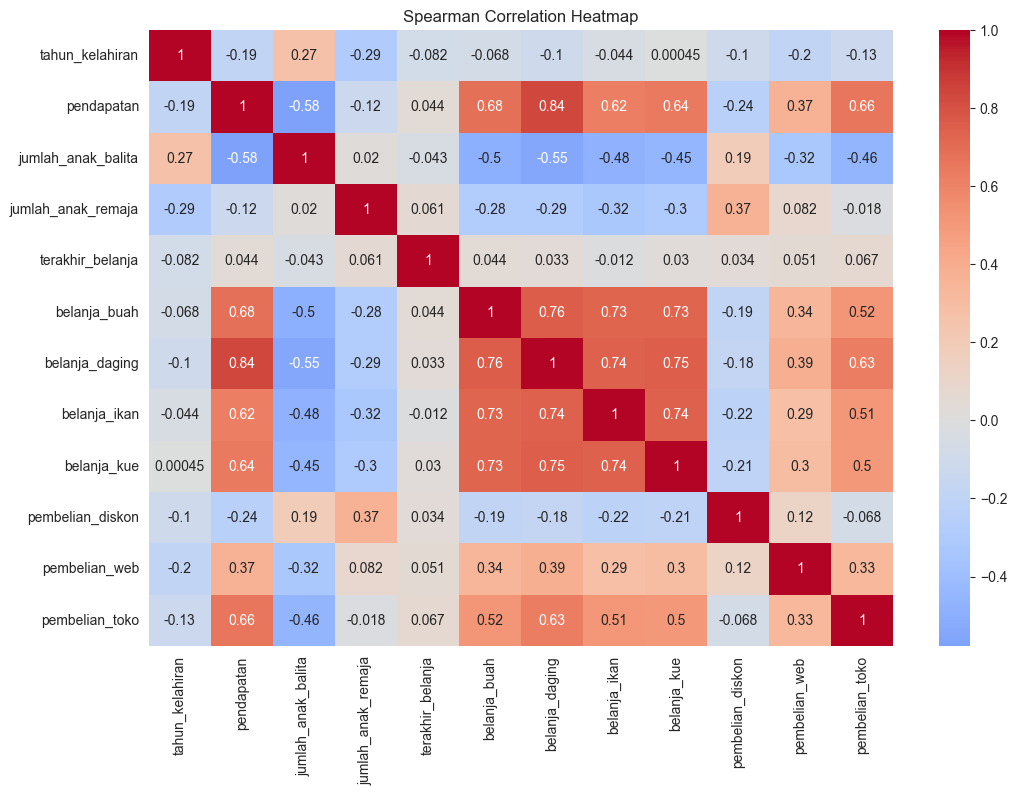

In [22]:
corr_spearman = df_train[numerik].corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_spearman,
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title("Spearman Correlation Heatmap")
plt.show()

💡 Insight

1.Pendapatan sebagai Faktor Kunci<br>
Pendapatan memiliki korelasi positif yang sangat kuat dengan hampir semua jenis pengeluaran, menandakan bahwa daya beli adalah penggerak utama konsumsi.<br>
Belanja Pangan: Daging (0.84), Buah (0.68), Kue (0.64), Ikan (0.62).<br>
Kanal Belanja: Pembelian di Toko (0.66) dan Web (0.37).<br>
**Interpretasi:** Semakin tinggi pendapatan, semakin besar intensitas konsumsi pelanggan, terutama pada produk protein (daging) dan kecenderungan untuk berbelanja secara luring (offline).

2.Struktur Keluarga Memengaruhi Pola Konsumsi<br>
Keberadaan anak balita memiliki dampak signifikan (korelasi negatif) terhadap ekonomi keluarga.<br>
Terhadap Pendapatan: Berkorelasi negatif cukup kuat (-0.58).<br>
Terhadap Belanja Pangan: Menekan belanja Buah, Daging, Ikan, dan Kue (kisar -0.45 s.d. -0.55).<br>
**Interpretasi:** Rumah tangga dengan banyak balita cenderung memiliki pendapatan yang lebih rendah (mungkin pasangan muda) dan harus melakukan penghematan pada pos belanja konsumsi sekunder/tersier.

3.Pola Belanja Pangan Saling Berkaitan<br>
Ditemukan korelasi yang sangat tinggi antar kategori produk pangan:<br>
Buah – Daging (0.76)<br>
Daging – Ikan (0.74)<br>
Ikan – Kue (0.74)<br>
**Interpretasi:** Ini menunjukkan pola Komplementer, bukan Substitusi. Artinya, pelanggan yang loyal berbelanja satu kategori produk (misal: daging), cenderung juga akan memborong kategori lainnya (buah/kue). Mereka adalah tipe big spender untuk kebutuhan dapur.

4.Kanal Pembelian: Dominasi Toko Fisik<br>
Perilaku belanja luring (toko) masih lebih dominan dibandingkan daring (web).<br>
Pembelian Toko: Berkorelasi kuat dengan Pendapatan (0.66) dan Belanja Pangan (0.50 – 0.63).<br>
Pembelian Web: Korelasi ada, namun lebih lemah (≈ 0.29 – 0.39).<br>
**Interpretasi:** Belanja offline (Toko) masih menjadi kanal utama yang sangat sensitif terhadap daya beli. Pelanggan kaya lebih suka datang langsung ke toko, mungkin untuk memastikan kualitas produk segar (daging/buah).

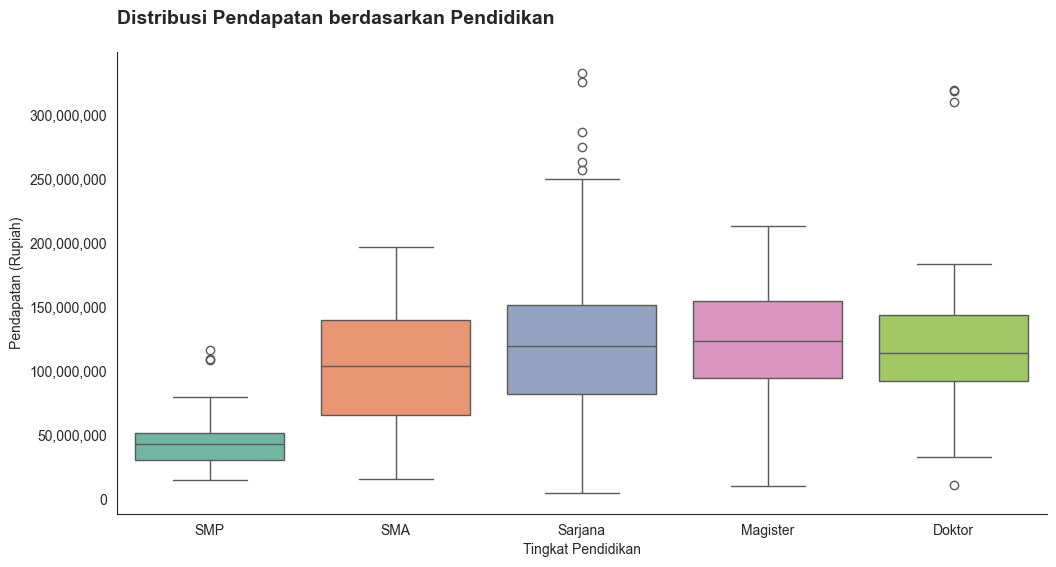

In [27]:
# Mengetahui distribusi pendapatan berdasarkan pendidikan
plt.figure(figsize=(12, 6))
sns.boxplot(x='pendidikan', y='pendapatan', data=df_train, order=['SMP', 'SMA', 'Sarjana', 'Magister', 'Doktor'], palette='Set2')
plt.title('Distribusi Pendapatan berdasarkan Pendidikan', fontsize=14, weight='bold', loc='left', pad=20)
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Pendapatan (Rupiah)')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.grid(False)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

💡Insight:
Terdapat 5 orang dengan pendapatan di atas 300 juta dengan latar belakang yang berbeda:
1. Top 1 (Rp 332 Juta): Pendidikan Sarjana (Kelahiran 1977)
2. Top 2 (Rp 325 Juta): Pendidikan Sarjana (Kelahiran 1977)
3. Top 3 (Rp 319 Juta): Pendidikan Doktor (Kelahiran 1976)
4. Top 4 (Rp 319 Juta): Pendidikan Doktor (Kelahiran 1976)
5. Top 5 (Rp 310 Juta): Pendidikan Doktor (Kelahiran 1951)

#### **- Multivariate Analysis**

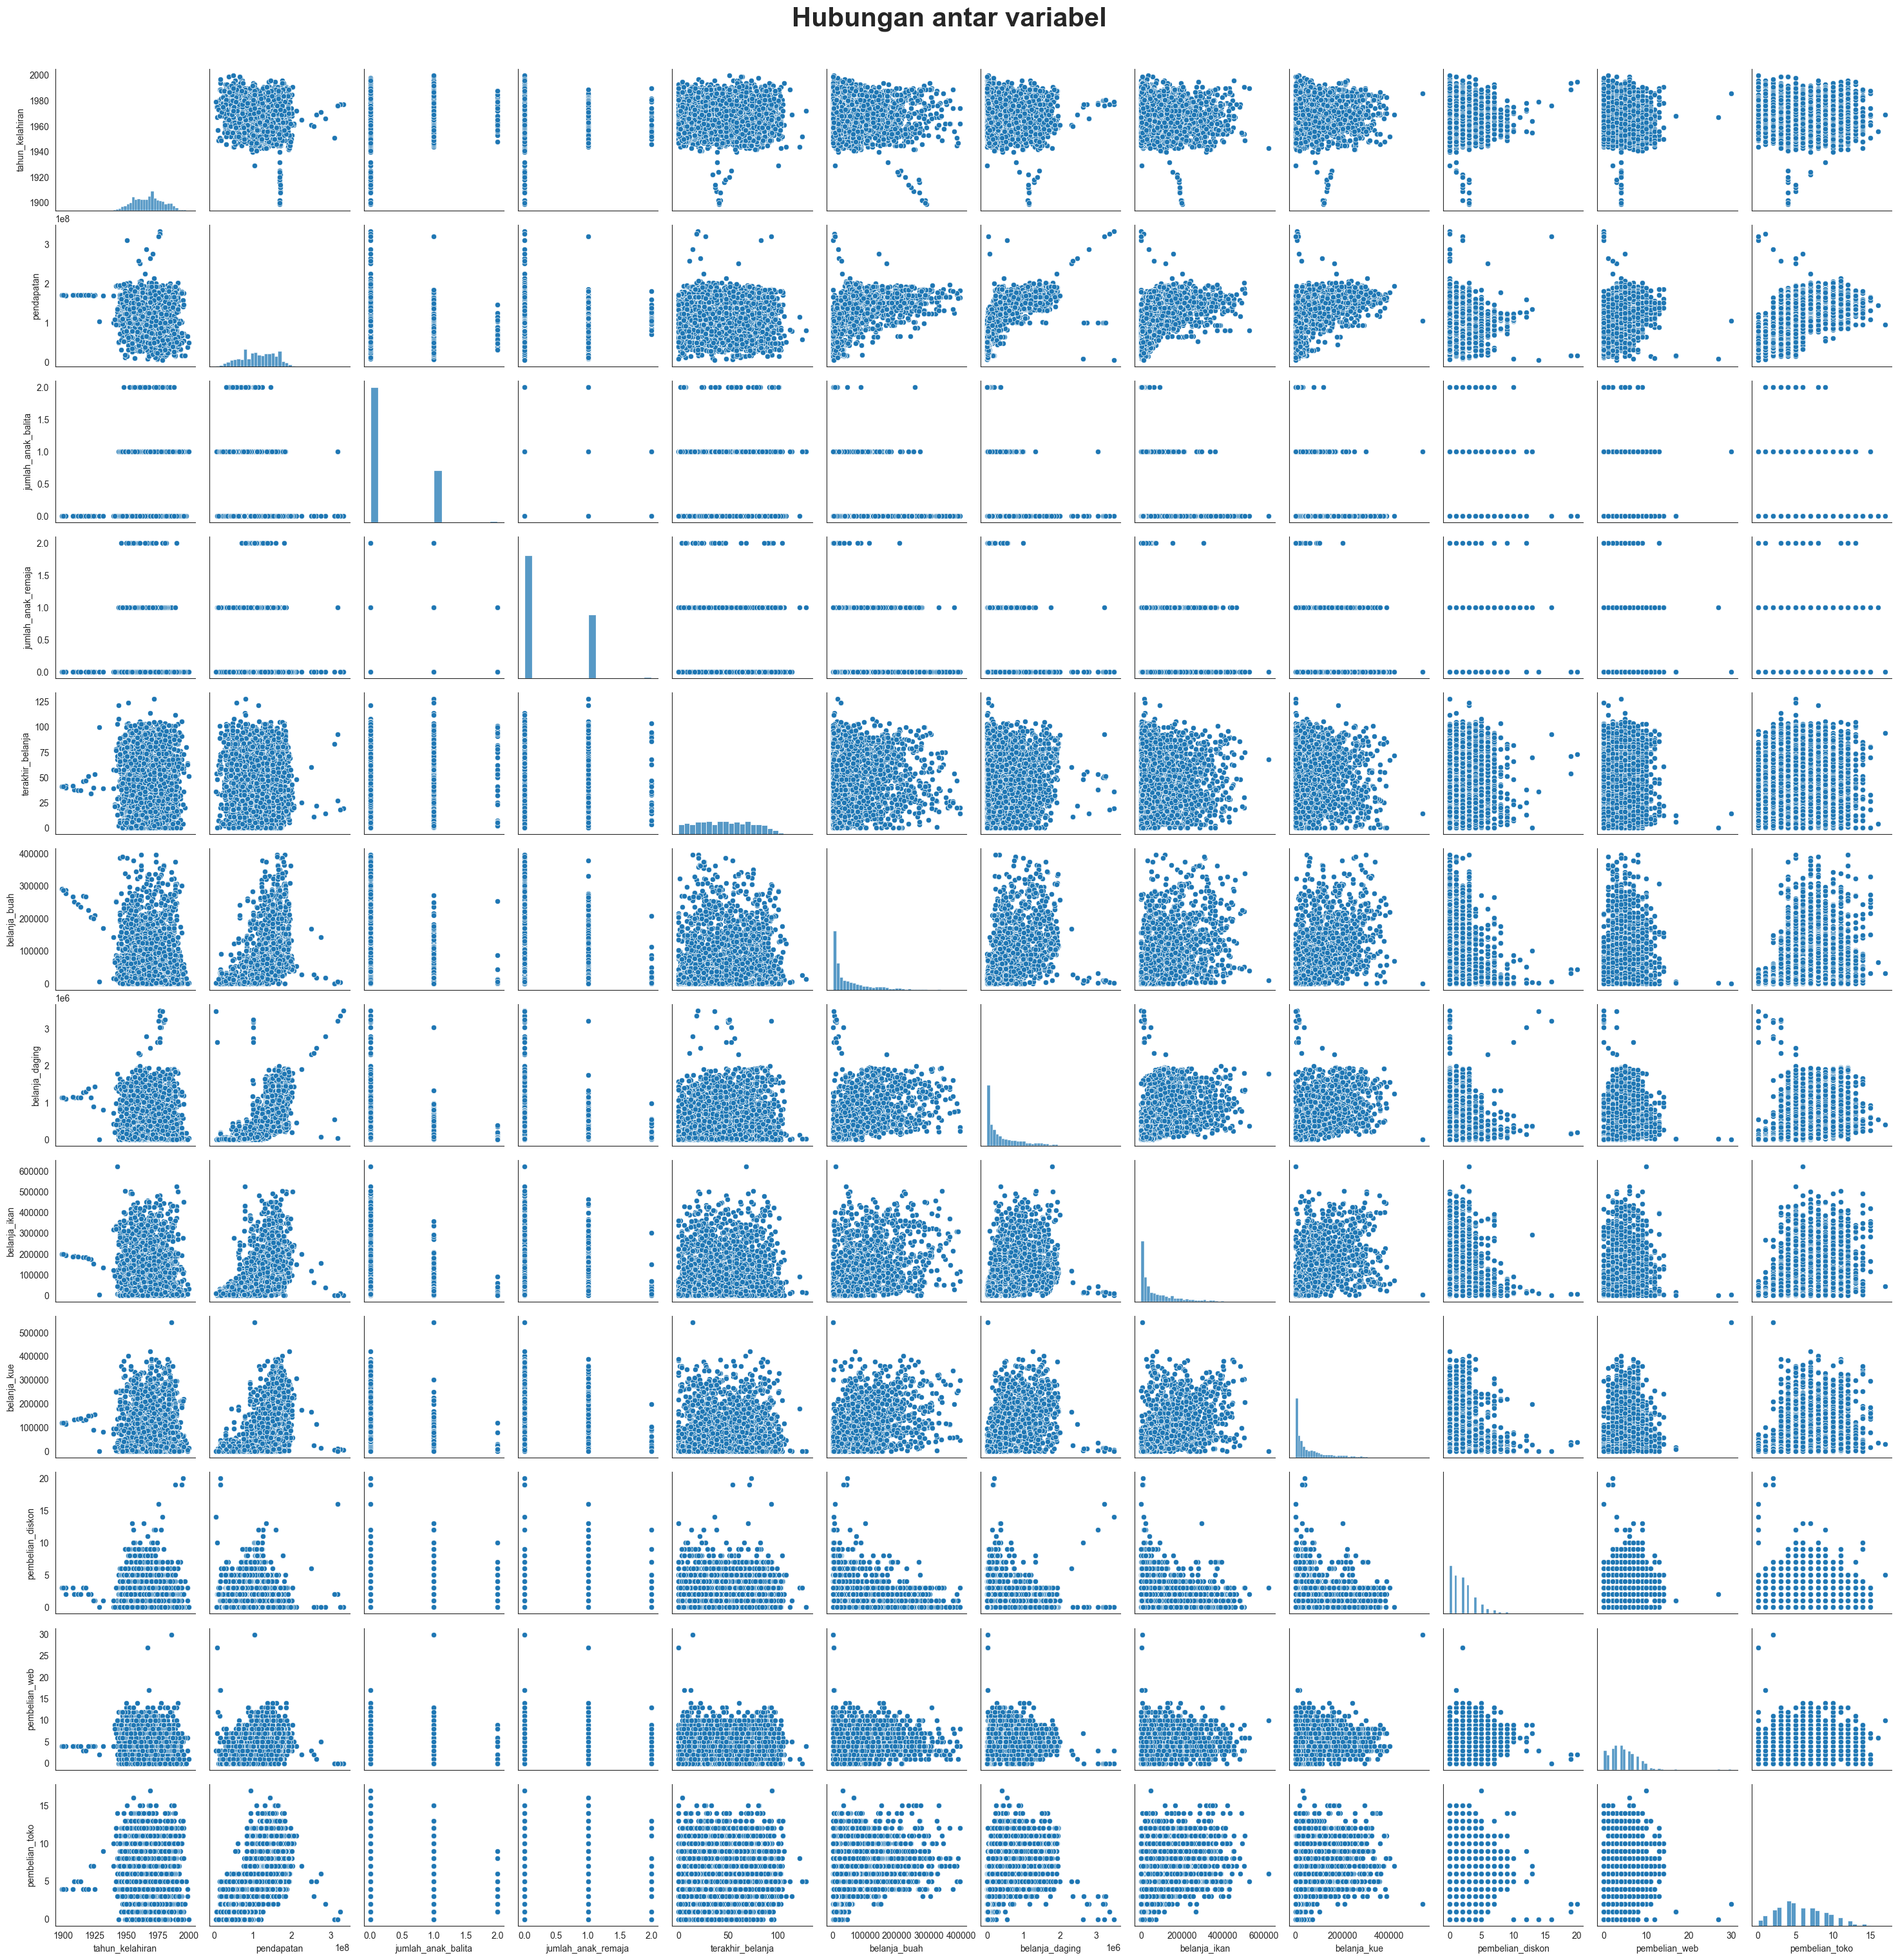

In [ ]:
# menganalisis hubungan tiap atribut
sns.pairplot(df_train[numerik], palette="Blues_r")
plt.suptitle("Hubungan antar variabel", y=1.02, size='30', weight='bold')
plt.show()

💡Insight: <br>
Atribut `pendapatan` menunjukan hubungan linear positif dengan atribut belanja, sehingga untuk teknik inputasi missing valuenya bisa menggunakan regresi